In [1]:
# Import necessary packages
import requests
import urllib.request
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
from urllib.request import urlopen
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
list_of_genres = ['children', 'fantasy', 'action', 'crime', 'drama', 'Sci-Fi', 'adventure', 'biography', 'comedy', 'thriller', 'musical', 'western', 'romance', 'war', 'horror', 'sport', 'history', 'family', 'biography']

conflict_grades = {'children':3, 'fantasy':3, 'action':7, 'crime':9, 'drama':4, 'Sci-Fi':8, 'adventure':7, 'biography':5, 'comedy':4, 'thriller':7, 'musical':4, 'western':8, 'romance':3, 'war':10, 'horror':10, 'sport':4, 'history':6, 'family':3}
conflict_grades_df = pd.DataFrame(conflict_grades.items(), columns=['Genres', 'Grade'])
#war_grades_df.set_index('Genres')
len(list_of_genres)

19

#Works
def get_IMDB_names(url):
    rn = requests.get(url)
    soup = BeautifulSoup(rn.text, 'html.parser')
    movie_containers = soup.find_all('div', class_ = 'lister-item mode-advanced')
    names = []
    for container in movie_containers:
# Extract:
# The name
        name = container.select('img')[0]['alt']
        names.append(name)
    return names

def get_IMDB_years(url):
    ry = requests.get(url)
    soup = BeautifulSoup(ry.text, 'html.parser')
    movie_containers = soup.find_all('div', class_ = 'lister-item mode-advanced')
    years = []
    for container in movie_containers:
        # The year
        year = container.find('span', class_ = 'lister-item-year').text
        year = str(year)
        years.append(year)
        year = str(year)
        year = year[1:5]
    return years

def no_comma(genre_movie):
    new_genre_movie = []
    for i in genre_movie:
        if ',' in i:
            new_genre_movie.append(i[:-1])
        else:
            new_genre_movie.append(i)
    return new_genre_movie

#For Zeitgeist
def get_IMDB_genres(url):
    rg = requests.get(url)
    soup = BeautifulSoup(rg.text, 'html.parser')
    genre = soup.find_all('span', class_= 'genre')
    genre_array = []
    for g in genre:
        genre_array.append(str(g.get_text()[1:].rstrip()))
    return genre_array
#f = get_IMDB_genres('https://www.imdb.com/search/title/?title_type=feature&release_date=1980-01-01,1980-12-31&user_rating=5.0,10.0&countries=us&sort=moviemeter,desc&count=250')
#print(f)

In [3]:
def get_IMDB_genres(url):
    rg = requests.get(url)
    soup = BeautifulSoup(rg.text, 'html.parser')
    movie_containers = soup.find_all('div', class_ = 'lister-item mode-advanced')
    genre_array = []
    for container in movie_containers:
        genres = container.find('span', class_ ='genre')
        if genres:
            genre_array.append(genres.text.strip())
        else:
            genre_array.append('None')
    return genre_array


In [4]:
#f = get_IMDB_genres('https://www.imdb.com/search/title/?title_type=feature&release_date=1981-01-01,1981-12-31&user_rating=5.0,10.0&countries=us&sort=moviemeter,desc&count=250')

action_count = 0
for item in f:
    if 'Action' in item:
        action_count += 1
print(action_count)

children_count = 0
for item in f:
    if 'Children' in item:
        children_count += 1
print(children_count)

comedy_count = 0
for item in f:
    if 'Comedy' in item:
        comedy_count += 1
print(comedy_count)

adventure_count = 0
for item in f:
    if 'Adventure' in item:
        adventure_count += 1
print(adventure_count)

drama_count = 0
for item in f:
    if 'Drama' in item:
        drama_count += 1
print(drama_count)

romance_count = 0
for item in f:
    if 'Romance' in item:
        romance_count += 1
print(romance_count)

western_count = 0
for item in f:
    if 'Western' in item:
        western_count += 1
print(western_count)

thriller_count = 0
for item in f:
    if 'Thriller' in item:
        thriller_count += 1
print(thriller_count)

horror_count = 0
for item in f:
    if 'Horror' in item:
        horror_count += 1
print(horror_count)

crime_count = 0
for item in f:
    if 'Crime' in item:
        crime_count += 1
print(crime_count)

scifi_count = 0
for item in f:
    if 'Sci' in item:
        scifi_count += 1
print(scifi_count)

family_count = 0
for item in f:
    if 'Family' in item:
        family_count += 1
print(family_count)

history_count = 0
for item in f:
    if 'History' in item:
        history_count += 1
print(history_count)

war_count = 0
for item in f:
    if 'War' in item:
        war_count += 1
print(war_count)

fantasy_count = 0
for item in f:
    if 'Fantasy' in item:
        fantasy_count += 1
print(fantasy_count)

sport_count = 0
for item in f:
    if 'Sport' in item:
        sport_count += 1
print(sport_count)

musical_count = 0
for item in f:
    if 'Musical' in item:
        musical_count += 1
print(musical_count)

genre_counts = {'children':children_count, 'fantasy':fantasy_count, 'action':action_count, 'crime':crime_count, 'drama':drama_count, 'Sci-Fi':scifi_count, 'adventure':adventure_count, 'comedy':comedy_count, 'thriller':thriller_count, 'musical':musical_count, 'western':western_count, 'romance':romance_count, 'war':war_count, 'horror':horror_count, 'sport':sport_count, 'history':history_count, 'family':family_count }
genre_counts

In [5]:
#function that will get the violence grade for a year
def get_IMDB_genre_popularity(year):
    url = 'https://www.imdb.com/search/title/?title_type=feature&release_date='+str(year)+'-01-01,'+str(year)+'-12-31&user_rating=5.0,10.0&countries=us&sort=moviemeter,desc&count=250'
    f = get_IMDB_genres(url)
    action_count = 0
    for item in f:
        if 'Action' in item:
            action_count += 1
    comedy_count = 0
    for item in f:
        if 'Comedy' in item:
            comedy_count += 1 
    adventure_count = 0
    for item in f:
        if 'Adventure' in item:
            adventure_count += 1
    drama_count = 0
    for item in f:
        if 'Drama' in item:
            drama_count += 1
    romance_count = 0
    for item in f:
        if 'Romance' in item:
            romance_count += 1  
    western_count = 0
    for item in f:
        if 'Western' in item:
            western_count += 1
    thriller_count = 0
    for item in f:
        if 'Thriller' in item:
            thriller_count += 1
    horror_count = 0
    for item in f:
        if 'Horror' in item:
            horror_count += 1
    crime_count = 0
    for item in f:
        if 'Crime' in item:
            crime_count += 1
    scifi_count = 0
    for item in f:
        if 'Sci' in item:
            scifi_count += 1
    family_count = 0
    for item in f:
        if 'Family' in item:
            family_count += 1
    history_count = 0
    for item in f:
        if 'History' in item:
            history_count += 1
    war_count = 0
    for item in f:
        if 'War' in item:
            war_count += 1
    fantasy_count = 0
    for item in f:
        if 'Fantasy' in item:
            fantasy_count += 1
    sport_count = 0
    for item in f:
        if 'Sport' in item:
            sport_count += 1
    musical_count = 0
    for item in f:
        if 'Musical' in item:
            musical_count += 1
    genre_counts = {'fantasy':fantasy_count,
                    'action':action_count,
                    'crime':crime_count,
                    'drama':drama_count,
                    'Sci-Fi':scifi_count,
                    'adventure':adventure_count,
                    'comedy':comedy_count,
                    'thriller':thriller_count,
                    'musical':musical_count,
                    'western':western_count,
                    'romance':romance_count,
                    'war':war_count,
                    'horror':horror_count,
                    'sport':sport_count,
                    'history':history_count,
                    'family':family_count }
    df_to_plot = pd.DataFrame(genre_counts.items(), columns=['Genres', 'Genre_count'])
    years = [year]*len(df_to_plot)
    df_to_plot['year'] = years
    return df_to_plot
#df = get_IMDB_genre_popularity(2015)
#df


def get_IMDB_genres(url):
    rg = requests.get(url)
    soup = BeautifulSoup(rg.text, 'html.parser')
    movie_containers = soup.find_all('div', class_ = 'lister-item mode-advanced')
    genre_array = []
    for container in movie_containers:
        genres = container.find('span', class_ ='genre')
        if genres:
            genre_array.append([genres.text.strip()])
        else:
            genre_array.append('None')
    return genre_array
f = get_IMDB_genres('https://www.imdb.com/search/title/?title_type=feature&release_date=1980-01-01,1980-12-31&user_rating=5.0,10.0&countries=us&sort=moviemeter,desc&count=250')

pieces = []
for year in [*range(1980,2000,1)]:
    popularity_df= get_IMDB_genre_popularity(year)
    pieces.append(popularity_df)
df_popularity_all = pd.concat(pieces)
#df_popularity_all.to_csv('IMDB_popularity_80_19.csv', index=False, header = True)


In [16]:
pieces = []
for year in [*range(1980,2020,1)]:
    df= get_IMDB_genre_popularity(year)
    pieces.append(df)
df_all = pd.concat(pieces)
df_all

,Genres,Genre_count,year
0,fantasy,8,1980
1,action,34,1980
2,crime,26,1980
3,drama,96,1980
4,Sci-Fi,12,1980
...,...,...,...
11,war,1,2019
12,horror,43,2019
13,sport,2,2019
14,history,1,2019


In [17]:
df_all.to_csv('Final_genres_IMDB.csv', index=False, header = True)

In [30]:
len(df_all)

640

In [101]:
df_genres = df_all.groupby('Genres')
plt.figure(figsize=(20,40)
for index, (Genres, year)in enumerate(df_genres):
           ax=plt.subplot(4,4, index+1)
           Genres.plot(x='year', y='Genre_count',legend=False)
           as.set_title(Genre)
           

SyntaxError: invalid syntax (<ipython-input-101-3e087167f21f>, line 3)

In [36]:
import sqlite3
conn = sqlite3.connect('genres.db')
df_all.to_sql('Genres', conn, if_exists='replace', index=False)
pd.read_sql('Select * from Genres', conn)

,Genres,Genre_count,year
0,fantasy,8,1980
1,action,34,1980
2,crime,26,1980
3,drama,96,1980
4,Sci-Fi,12,1980
...,...,...,...
635,war,1,2019
636,horror,43,2019
637,sport,2,2019
638,history,1,2019


In [38]:
conn.commit()

In [40]:
cur = conn.cursor()

In [44]:
cur.execute("""SELECT * FROM Genres
               WHERE Genres = 'fantasy';""")
df_fantasy = pd.DataFrame(cur.fetchall())
df_fantasy.columns = [x[0] for x in cur.description]

In [45]:
df_fantasy

,Genres,Genre_count,year
0,fantasy,8,1980
1,fantasy,8,1981
2,fantasy,13,1982
3,fantasy,6,1983
4,fantasy,12,1984
5,fantasy,20,1985
6,fantasy,10,1986
7,fantasy,16,1987
8,fantasy,13,1988
9,fantasy,11,1989


In [70]:
cur.execute("""SELECT * FROM Genres
               WHERE Genres = 'action';""")
df_action = pd.DataFrame(cur.fetchall())
df_action.columns = [x[0] for x in cur.description]
#df_action

In [71]:
cur.execute("""SELECT * FROM Genres
               WHERE Genres = 'crime';""")
df_crime = pd.DataFrame(cur.fetchall())
df_crime.columns = [x[0] for x in cur.description]
#df_crime

In [72]:
cur.execute("""SELECT * FROM Genres
               WHERE Genres = 'drama';""")
df_drama = pd.DataFrame(cur.fetchall())
df_drama.columns = [x[0] for x in cur.description]
#df_drama

In [73]:
cur.execute("""SELECT * FROM Genres
               WHERE Genres = 'Sci-Fi';""")
df_SciFi = pd.DataFrame(cur.fetchall())
df_SciFi.columns = [x[0] for x in cur.description]
#df_SciFi

In [74]:
cur.execute("""SELECT * FROM Genres
               WHERE Genres = 'adventure';""")
df_adventure = pd.DataFrame(cur.fetchall())
df_adventure.columns = [x[0] for x in cur.description]
#df_adventure

In [75]:
cur.execute("""SELECT * FROM Genres
               WHERE Genres = 'comedy';""")
df_comedy = pd.DataFrame(cur.fetchall())
df_comedy.columns = [x[0] for x in cur.description]
#df_comedy

In [76]:
cur.execute("""SELECT * FROM Genres
               WHERE Genres = 'thriller';""")
df_thriller = pd.DataFrame(cur.fetchall())
df_thriller.columns = [x[0] for x in cur.description]
#df_thriller

In [77]:
cur.execute("""SELECT * FROM Genres
               WHERE Genres = 'musical';""")
df_musical = pd.DataFrame(cur.fetchall())
df_musical.columns = [x[0] for x in cur.description]
#df_musical

In [78]:
cur.execute("""SELECT * FROM Genres
               WHERE Genres = 'western';""")
df_western = pd.DataFrame(cur.fetchall())
df_western.columns = [x[0] for x in cur.description]
#df_western

In [79]:
cur.execute("""SELECT * FROM Genres
               WHERE Genres = 'romance';""")
df_romance = pd.DataFrame(cur.fetchall())
df_romance.columns = [x[0] for x in cur.description]
#df_romance

In [80]:
cur.execute("""SELECT * FROM Genres
               WHERE Genres = 'war';""")
df_war = pd.DataFrame(cur.fetchall())
df_war.columns = [x[0] for x in cur.description]
#df_war

In [81]:
cur.execute("""SELECT * FROM Genres
               WHERE Genres = 'horror';""")
df_horror = pd.DataFrame(cur.fetchall())
df_horror.columns = [x[0] for x in cur.description]
#df_horror

In [82]:
cur.execute("""SELECT * FROM Genres
               WHERE Genres = 'sport';""")
df_sport = pd.DataFrame(cur.fetchall())
df_sport.columns = [x[0] for x in cur.description]
#df_sport

In [83]:
cur.execute("""SELECT * FROM Genres
               WHERE Genres = 'history';""")
df_history = pd.DataFrame(cur.fetchall())
df_history.columns = [x[0] for x in cur.description]
#df_history

In [84]:
cur.execute("""SELECT * FROM Genres
               WHERE Genres = 'family';""")
df_family = pd.DataFrame(cur.fetchall())
df_family.columns = [x[0] for x in cur.description]
#df_family

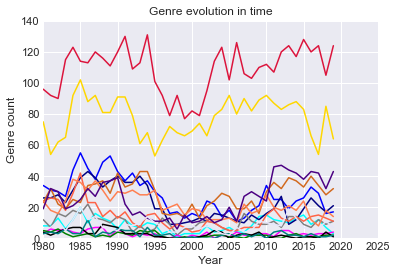

<Figure size 3240x720 with 0 Axes>

In [188]:
new_figure = plt.figure()
sns.set(rc={'figure.figsize':(12.7,8.6)})

plt.figure(figsize=(45,10))
#plt.figure(figsize=(100,100))
plt.style.use('seaborn-darkgrid')
ax=new_figure.add_subplot(111)
ax.plot(df_fantasy['year'], df_fantasy['Genre_count'], color = 'aqua', linestyle='-')
ax.plot(df_action['year'], df_action['Genre_count'], color = 'blue', linestyle = '-')
ax.plot(df_crime['year'], df_crime['Genre_count'], color = 'navy', linestyle = '-')
ax.plot(df_drama['year'], df_drama['Genre_count'], color = 'crimson', linestyle = '-')
ax.plot(df_SciFi['year'], df_SciFi['Genre_count'], color = 'grey', linestyle = '-')
ax.plot(df_adventure['year'], df_adventure['Genre_count'], color = 'tomato', linestyle = '-')
ax.plot(df_comedy['year'], df_comedy['Genre_count'], color = 'gold', linestyle = '-')
ax.plot(df_thriller['year'], df_thriller['Genre_count'], color = 'chocolate', linestyle = '-')
ax.plot(df_musical['year'], df_musical['Genre_count'], color = 'magenta', linestyle = '-')
ax.plot(df_western['year'], df_western['Genre_count'], color = 'green', linestyle = '-')
ax.plot(df_romance['year'], df_romance['Genre_count'], color = 'coral', linestyle = '-')
ax.plot(df_war['year'], df_war['Genre_count'], color = 'black', linestyle = '-')
ax.plot(df_horror['year'], df_horror['Genre_count'], color = 'indigo', linestyle = '-')
ax.plot(df_sport['year'], df_sport['Genre_count'], color = 'teal', linestyle = '-')
ax.plot(df_family['year'], df_family['Genre_count'], color = 'lavender', linestyle = '-')
ax.set_xlim(1980, 2025), ax.set_ylim(0,140)
ax.set_xlabel('Year')
ax.set_ylabel('Genre count')
ax.set_title('Genre evolution in time')
plt.show()

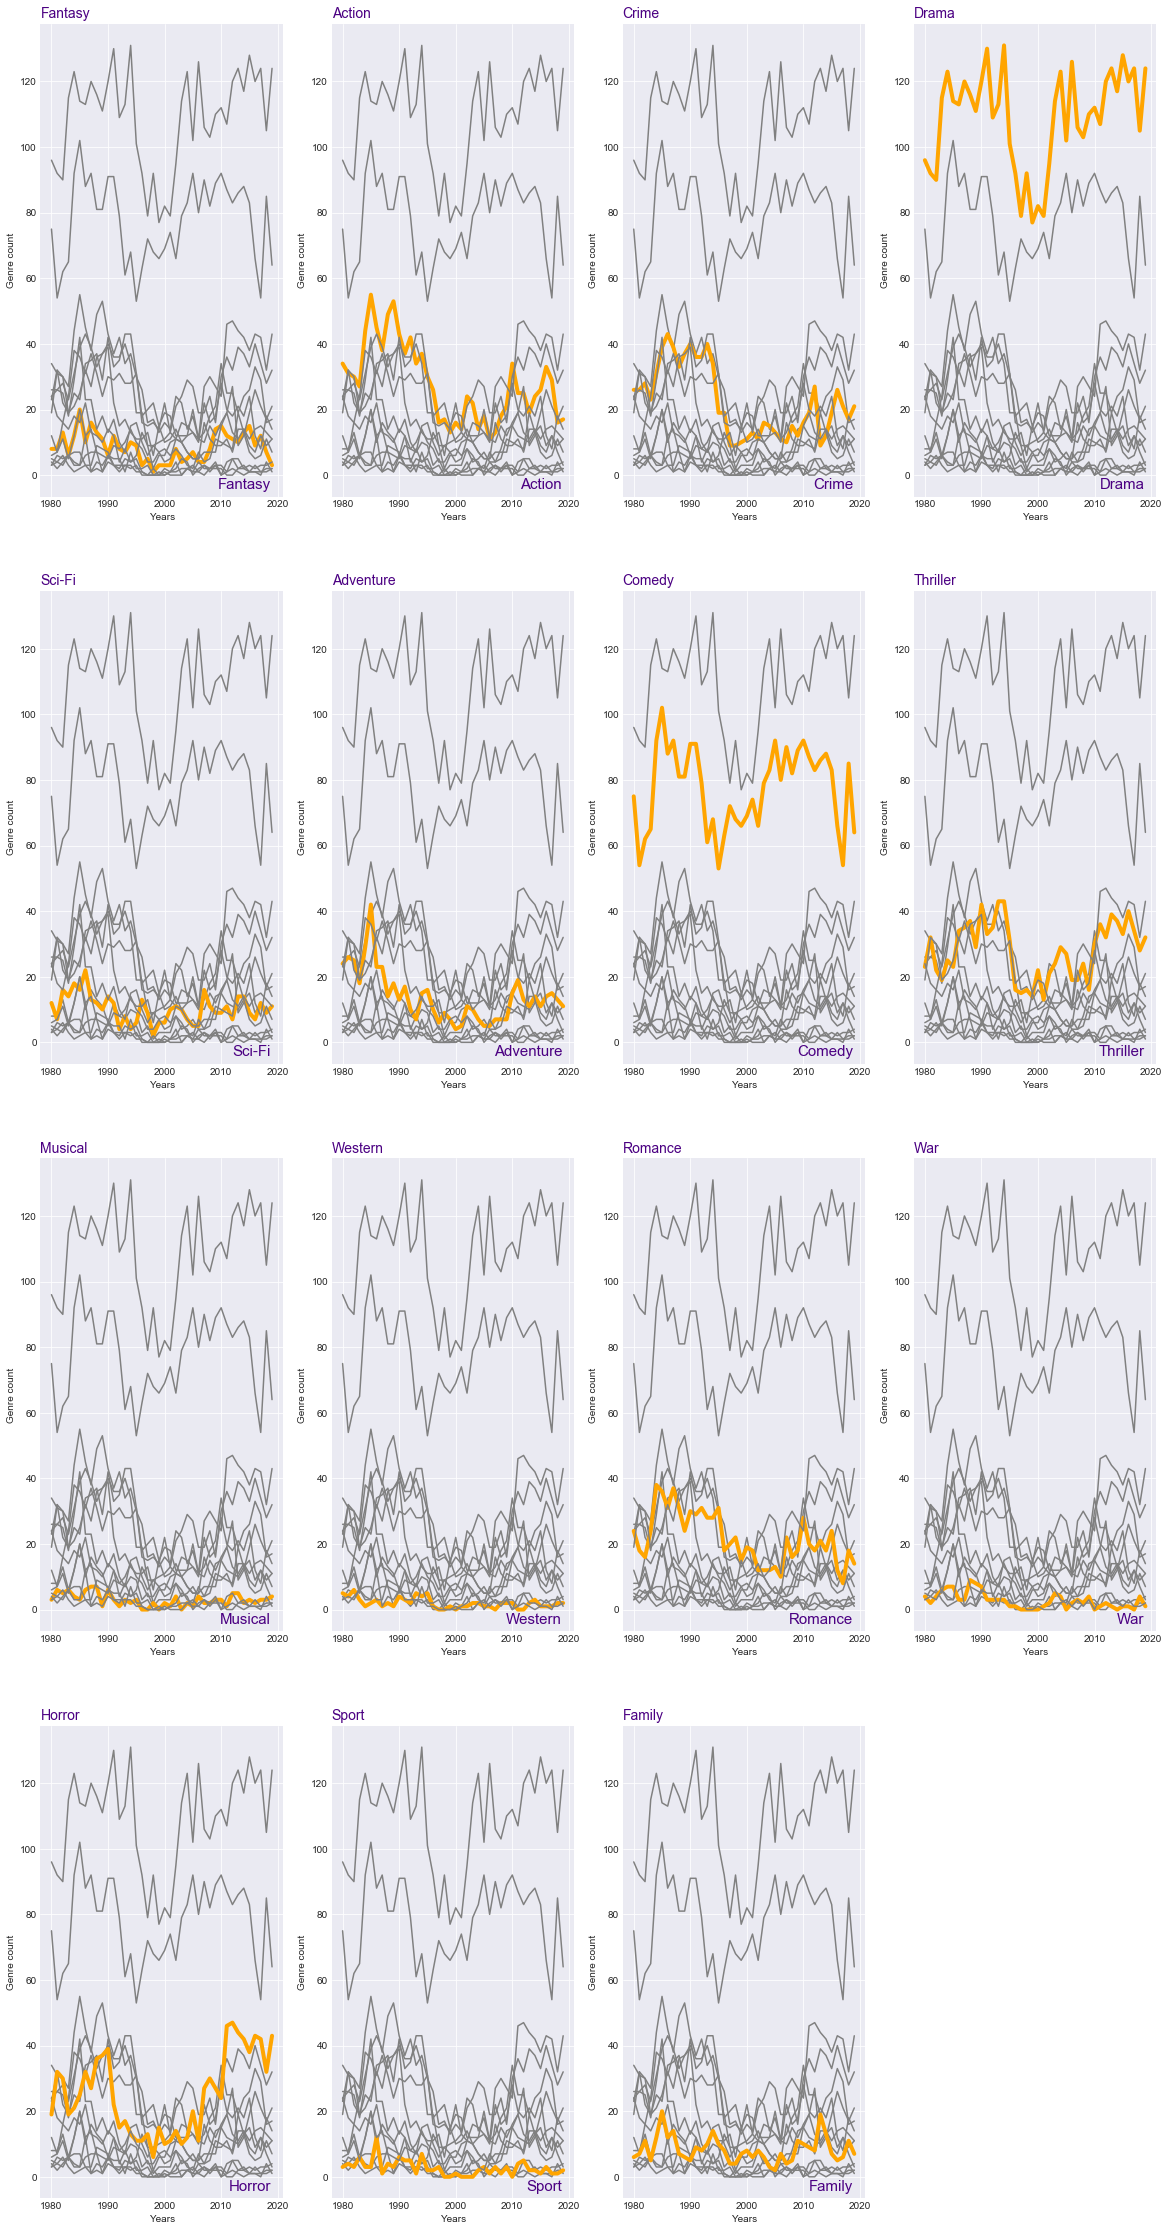

In [180]:
fig = plt.figure(figsize=(20,40))
ax = plt.subplot(1,1,1)
plt.style.use('seaborn-darkgrid')
ax1 = plt.subplot(4,4,1)
ax1.plot(df_fantasy['year'], df_fantasy['Genre_count'], color = 'orange', linestyle='-', linewidth=4)
ax1.plot(df_action['year'], df_action['Genre_count'], color = 'grey', linestyle = '-')
ax1.plot(df_crime['year'], df_crime['Genre_count'], color = 'grey', linestyle = '-')
ax1.plot(df_drama['year'], df_drama['Genre_count'], color = 'grey', linestyle = '-')
ax1.plot(df_SciFi['year'], df_SciFi['Genre_count'], color = 'grey', linestyle = '-')
ax1.plot(df_adventure['year'], df_adventure['Genre_count'], color = 'grey', linestyle = '-')
ax1.plot(df_comedy['year'], df_comedy['Genre_count'], color = 'grey', linestyle = '-')
ax1.plot(df_thriller['year'], df_thriller['Genre_count'], color = 'grey', linestyle = '-')
ax1.plot(df_musical['year'], df_musical['Genre_count'], color = 'grey', linestyle = '-')
ax1.plot(df_western['year'], df_western['Genre_count'], color = 'grey', linestyle = '-')
ax1.plot(df_romance['year'], df_romance['Genre_count'], color = 'grey', linestyle = '-')
ax1.plot(df_war['year'], df_war['Genre_count'], color = 'grey', linestyle = '-')
ax1.plot(df_horror['year'], df_horror['Genre_count'], color = 'grey', linestyle = '-')
ax1.plot(df_sport['year'], df_sport['Genre_count'], color = 'grey', linestyle = '-')
ax1.plot(df_family['year'], df_family['Genre_count'], color = 'grey', linestyle = '-')
ax1.set_title('Fantasy', loc='left', fontsize=14, fontweight=0, color='indigo')
ax1.text(0.95, 0.01, 'Fantasy',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax1.transAxes,
        color='indigo', fontsize=15)
plt.xlabel("Years")
plt.ylabel("Genre count")

ax2 = plt.subplot(4,4,2)
ax2.plot(df_fantasy['year'], df_fantasy['Genre_count'], color = 'grey', linestyle='-')
ax2.plot(df_action['year'], df_action['Genre_count'], color = 'orange', linestyle = '-', linewidth=4)
ax2.plot(df_crime['year'], df_crime['Genre_count'], color = 'grey', linestyle = '-')
ax2.plot(df_drama['year'], df_drama['Genre_count'], color = 'grey', linestyle = '-')
ax2.plot(df_SciFi['year'], df_SciFi['Genre_count'], color = 'grey', linestyle = '-')
ax2.plot(df_adventure['year'], df_adventure['Genre_count'], color = 'grey', linestyle = '-')
ax2.plot(df_comedy['year'], df_comedy['Genre_count'], color = 'grey', linestyle = '-')
ax2.plot(df_thriller['year'], df_thriller['Genre_count'], color = 'grey', linestyle = '-')
ax2.plot(df_musical['year'], df_musical['Genre_count'], color = 'grey', linestyle = '-')
ax2.plot(df_western['year'], df_western['Genre_count'], color = 'grey', linestyle = '-')
ax2.plot(df_romance['year'], df_romance['Genre_count'], color = 'grey', linestyle = '-')
ax2.plot(df_war['year'], df_war['Genre_count'], color = 'grey', linestyle = '-')
ax2.plot(df_horror['year'], df_horror['Genre_count'], color = 'grey', linestyle = '-')
ax2.plot(df_sport['year'], df_sport['Genre_count'], color = 'grey', linestyle = '-')
ax2.plot(df_family['year'], df_family['Genre_count'], color = 'grey', linestyle = '-')
ax2.set_title('Action', loc='left', fontsize=14, fontweight=0, color='indigo')
ax2.text(0.95, 0.01, 'Action',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax2.transAxes,
        color='indigo', fontsize=15)
plt.xlabel("Years")
plt.ylabel("Genre count")
ax3=plt.subplot(4,4,3)
ax3.plot(df_fantasy['year'], df_fantasy['Genre_count'], color = 'grey', linestyle='-')
ax3.plot(df_action['year'], df_action['Genre_count'], color = 'grey', linestyle = '-')
ax3.plot(df_crime['year'], df_crime['Genre_count'], color = 'orange', linestyle = '-', linewidth=4)
ax3.plot(df_drama['year'], df_drama['Genre_count'], color = 'grey', linestyle = '-')
ax3.plot(df_SciFi['year'], df_SciFi['Genre_count'], color = 'grey', linestyle = '-')
ax3.plot(df_adventure['year'], df_adventure['Genre_count'], color = 'grey', linestyle = '-')
ax3.plot(df_comedy['year'], df_comedy['Genre_count'], color = 'grey', linestyle = '-')
ax3.plot(df_thriller['year'], df_thriller['Genre_count'], color = 'grey', linestyle = '-')
ax3.plot(df_musical['year'], df_musical['Genre_count'], color = 'grey', linestyle = '-')
ax3.plot(df_western['year'], df_western['Genre_count'], color = 'grey', linestyle = '-')
ax3.plot(df_romance['year'], df_romance['Genre_count'], color = 'grey', linestyle = '-')
ax3.plot(df_war['year'], df_war['Genre_count'], color = 'grey', linestyle = '-')
ax3.plot(df_horror['year'], df_horror['Genre_count'], color = 'grey', linestyle = '-')
ax3.plot(df_sport['year'], df_sport['Genre_count'], color = 'grey', linestyle = '-')
ax3.plot(df_family['year'], df_family['Genre_count'], color = 'grey', linestyle = '-')
ax3.set_title('Crime', loc='left', fontsize=14, fontweight=0, color='indigo')
ax3.text(0.95, 0.01, 'Crime',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax3.transAxes,
        color='indigo', fontsize=15)
plt.xlabel("Years")
plt.ylabel("Genre count")
ax4 =plt.subplot(4,4,4)
ax4.plot(df_fantasy['year'], df_fantasy['Genre_count'], color = 'grey', linestyle='-')
ax4.plot(df_action['year'], df_action['Genre_count'], color = 'grey', linestyle = '-')
ax4.plot(df_crime['year'], df_crime['Genre_count'], color = 'grey', linestyle = '-')
ax4.plot(df_drama['year'], df_drama['Genre_count'], color = 'orange', linestyle = '-', linewidth=4)
ax4.plot(df_SciFi['year'], df_SciFi['Genre_count'], color = 'grey', linestyle = '-')
ax4.plot(df_adventure['year'], df_adventure['Genre_count'], color = 'grey', linestyle = '-')
ax4.plot(df_comedy['year'], df_comedy['Genre_count'], color = 'grey', linestyle = '-')
ax4.plot(df_thriller['year'], df_thriller['Genre_count'], color = 'grey', linestyle = '-')
ax4.plot(df_musical['year'], df_musical['Genre_count'], color = 'grey', linestyle = '-')
ax4.plot(df_western['year'], df_western['Genre_count'], color = 'grey', linestyle = '-')
ax4.plot(df_romance['year'], df_romance['Genre_count'], color = 'grey', linestyle = '-')
ax4.plot(df_war['year'], df_war['Genre_count'], color = 'grey', linestyle = '-')
ax4.plot(df_horror['year'], df_horror['Genre_count'], color = 'grey', linestyle = '-')
ax4.plot(df_sport['year'], df_sport['Genre_count'], color = 'grey', linestyle = '-')
ax4.plot(df_family['year'], df_family['Genre_count'], color = 'grey', linestyle = '-')
ax4.set_title('Drama', loc='left', fontsize=14, fontweight=0, color='indigo')
ax4.text(0.95, 0.01, 'Drama',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax4.transAxes,
        color='indigo', fontsize=15)
plt.xlabel("Years")
plt.ylabel("Genre count")
ax5 =plt.subplot(4,4,5)
ax5.plot(df_fantasy['year'], df_fantasy['Genre_count'], color = 'grey', linestyle='-')
ax5.plot(df_action['year'], df_action['Genre_count'], color = 'grey', linestyle = '-')
ax5.plot(df_crime['year'], df_crime['Genre_count'], color = 'grey', linestyle = '-')
ax5.plot(df_drama['year'], df_drama['Genre_count'], color = 'grey', linestyle = '-')
ax5.plot(df_SciFi['year'], df_SciFi['Genre_count'], color = 'orange', linestyle = '-', linewidth=4)
ax5.plot(df_adventure['year'], df_adventure['Genre_count'], color = 'grey', linestyle = '-')
ax5.plot(df_comedy['year'], df_comedy['Genre_count'], color = 'grey', linestyle = '-')
ax5.plot(df_thriller['year'], df_thriller['Genre_count'], color = 'grey', linestyle = '-')
ax5.plot(df_musical['year'], df_musical['Genre_count'], color = 'grey', linestyle = '-')
ax5.plot(df_western['year'], df_western['Genre_count'], color = 'grey', linestyle = '-')
ax5.plot(df_romance['year'], df_romance['Genre_count'], color = 'grey', linestyle = '-')
ax5.plot(df_war['year'], df_war['Genre_count'], color = 'grey', linestyle = '-')
ax5.plot(df_horror['year'], df_horror['Genre_count'], color = 'grey', linestyle = '-')
ax5.plot(df_sport['year'], df_sport['Genre_count'], color = 'grey', linestyle = '-')
ax5.plot(df_family['year'], df_family['Genre_count'], color = 'grey', linestyle = '-')
ax5.set_title('Sci-Fi', loc='left', fontsize=14, fontweight=0, color='indigo')
ax5.text(0.95, 0.01, 'Sci-Fi',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax5.transAxes,
        color='indigo', fontsize=15)
plt.xlabel("Years")
plt.ylabel("Genre count")
ax6 =plt.subplot(4,4,6)
ax6.plot(df_fantasy['year'], df_fantasy['Genre_count'], color = 'grey', linestyle='-')
ax6.plot(df_action['year'], df_action['Genre_count'], color = 'grey', linestyle = '-')
ax6.plot(df_crime['year'], df_crime['Genre_count'], color = 'grey', linestyle = '-')
ax6.plot(df_drama['year'], df_drama['Genre_count'], color = 'grey', linestyle = '-')
ax6.plot(df_SciFi['year'], df_SciFi['Genre_count'], color = 'grey', linestyle = '-')
ax6.plot(df_adventure['year'], df_adventure['Genre_count'], color = 'orange', linestyle = '-', linewidth=4)
ax6.plot(df_comedy['year'], df_comedy['Genre_count'], color = 'grey', linestyle = '-')
ax6.plot(df_thriller['year'], df_thriller['Genre_count'], color = 'grey', linestyle = '-')
ax6.plot(df_musical['year'], df_musical['Genre_count'], color = 'grey', linestyle = '-')
ax6.plot(df_western['year'], df_western['Genre_count'], color = 'grey', linestyle = '-')
ax6.plot(df_romance['year'], df_romance['Genre_count'], color = 'grey', linestyle = '-')
ax6.plot(df_war['year'], df_war['Genre_count'], color = 'grey', linestyle = '-')
ax6.plot(df_horror['year'], df_horror['Genre_count'], color = 'grey', linestyle = '-')
ax6.plot(df_sport['year'], df_sport['Genre_count'], color = 'grey', linestyle = '-')
ax6.plot(df_family['year'], df_family['Genre_count'], color = 'grey', linestyle = '-')
ax6.set_title('Adventure', loc='left', fontsize=14, fontweight=0, color='indigo')
ax6.text(0.95, 0.01, 'Adventure',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax6.transAxes,
        color='indigo', fontsize=15)
plt.xlabel("Years")
plt.ylabel("Genre count")
ax7=plt.subplot(4,4,7)
ax7.plot(df_fantasy['year'], df_fantasy['Genre_count'], color = 'grey', linestyle='-')
ax7.plot(df_action['year'], df_action['Genre_count'], color = 'grey', linestyle = '-')
ax7.plot(df_crime['year'], df_crime['Genre_count'], color = 'grey', linestyle = '-')
ax7.plot(df_drama['year'], df_drama['Genre_count'], color = 'grey', linestyle = '-')
ax7.plot(df_SciFi['year'], df_SciFi['Genre_count'], color = 'grey', linestyle = '-')
ax7.plot(df_adventure['year'], df_adventure['Genre_count'], color = 'grey', linestyle = '-')
ax7.plot(df_comedy['year'], df_comedy['Genre_count'], color = 'orange', linestyle = '-', linewidth=4)
ax7.plot(df_thriller['year'], df_thriller['Genre_count'], color = 'grey', linestyle = '-')
ax7.plot(df_musical['year'], df_musical['Genre_count'], color = 'grey', linestyle = '-')
ax7.plot(df_western['year'], df_western['Genre_count'], color = 'grey', linestyle = '-')
ax7.plot(df_romance['year'], df_romance['Genre_count'], color = 'grey', linestyle = '-')
ax7.plot(df_war['year'], df_war['Genre_count'], color = 'grey', linestyle = '-')
ax7.plot(df_horror['year'], df_horror['Genre_count'], color = 'grey', linestyle = '-')
ax7.plot(df_sport['year'], df_sport['Genre_count'], color = 'grey', linestyle = '-')
ax7.plot(df_family['year'], df_family['Genre_count'], color = 'grey', linestyle = '-')
ax7.set_title('Comedy', loc='left', fontsize=14, fontweight=0, color='indigo')
ax7.text(0.95, 0.01, 'Comedy',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax7.transAxes,
        color='indigo', fontsize=15)
plt.xlabel("Years")
plt.ylabel("Genre count")
ax8=plt.subplot(4,4,8)
ax8.plot(df_fantasy['year'], df_fantasy['Genre_count'], color = 'grey', linestyle='-')
ax8.plot(df_action['year'], df_action['Genre_count'], color = 'grey', linestyle = '-')
ax8.plot(df_crime['year'], df_crime['Genre_count'], color = 'grey', linestyle = '-')
ax8.plot(df_drama['year'], df_drama['Genre_count'], color = 'grey', linestyle = '-')
ax8.plot(df_SciFi['year'], df_SciFi['Genre_count'], color = 'grey', linestyle = '-')
ax8.plot(df_adventure['year'], df_adventure['Genre_count'], color = 'grey', linestyle = '-')
ax8.plot(df_comedy['year'], df_comedy['Genre_count'], color = 'grey', linestyle = '-')
ax8.plot(df_thriller['year'], df_thriller['Genre_count'], color = 'orange', linestyle = '-', linewidth=4)
ax8.plot(df_musical['year'], df_musical['Genre_count'], color = 'grey', linestyle = '-')
ax8.plot(df_western['year'], df_western['Genre_count'], color = 'grey', linestyle = '-')
ax8.plot(df_romance['year'], df_romance['Genre_count'], color = 'grey', linestyle = '-')
ax8.plot(df_war['year'], df_war['Genre_count'], color = 'grey', linestyle = '-')
ax8.plot(df_horror['year'], df_horror['Genre_count'], color = 'grey', linestyle = '-')
ax8.plot(df_sport['year'], df_sport['Genre_count'], color = 'grey', linestyle = '-')
ax8.plot(df_family['year'], df_family['Genre_count'], color = 'grey', linestyle = '-')
ax8.set_title('Thriller', loc='left', fontsize=14, fontweight=0, color='indigo')
ax8.text(0.95, 0.01, 'Thriller',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax8.transAxes,
        color='indigo', fontsize=15)
plt.xlabel("Years")
plt.ylabel("Genre count")
ax9=plt.subplot(4,4,9)
ax9.plot(df_fantasy['year'], df_fantasy['Genre_count'], color = 'grey', linestyle='-')
ax9.plot(df_action['year'], df_action['Genre_count'], color = 'grey', linestyle = '-')
ax9.plot(df_crime['year'], df_crime['Genre_count'], color = 'grey', linestyle = '-')
ax9.plot(df_drama['year'], df_drama['Genre_count'], color = 'grey', linestyle = '-')
ax9.plot(df_SciFi['year'], df_SciFi['Genre_count'], color = 'grey', linestyle = '-')
ax9.plot(df_adventure['year'], df_adventure['Genre_count'], color = 'grey', linestyle = '-')
ax9.plot(df_comedy['year'], df_comedy['Genre_count'], color = 'grey', linestyle = '-')
ax9.plot(df_thriller['year'], df_thriller['Genre_count'], color = 'grey', linestyle = '-')
ax9.plot(df_musical['year'], df_musical['Genre_count'], color = 'orange', linestyle = '-', linewidth=4)
ax9.plot(df_western['year'], df_western['Genre_count'], color = 'grey', linestyle = '-')
ax9.plot(df_romance['year'], df_romance['Genre_count'], color = 'grey', linestyle = '-')
ax9.plot(df_war['year'], df_war['Genre_count'], color = 'grey', linestyle = '-')
ax9.plot(df_horror['year'], df_horror['Genre_count'], color = 'grey', linestyle = '-')
ax9.plot(df_sport['year'], df_sport['Genre_count'], color = 'grey', linestyle = '-')
ax9.plot(df_family['year'], df_family['Genre_count'], color = 'grey', linestyle = '-')
ax9.set_title('Musical', loc='left', fontsize=14, fontweight=0, color='indigo')
ax9.text(0.95, 0.01, 'Musical',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax9.transAxes,
        color='indigo', fontsize=15)
plt.xlabel("Years")
plt.ylabel("Genre count")
ax10 = plt.subplot(4,4,10)
ax10.plot(df_fantasy['year'], df_fantasy['Genre_count'], color = 'grey', linestyle='-')
ax10.plot(df_action['year'], df_action['Genre_count'], color = 'grey', linestyle = '-')
ax10.plot(df_crime['year'], df_crime['Genre_count'], color = 'grey', linestyle = '-')
ax10.plot(df_drama['year'], df_drama['Genre_count'], color = 'grey', linestyle = '-')
ax10.plot(df_SciFi['year'], df_SciFi['Genre_count'], color = 'grey', linestyle = '-')
ax10.plot(df_adventure['year'], df_adventure['Genre_count'], color = 'grey', linestyle = '-')
ax10.plot(df_comedy['year'], df_comedy['Genre_count'], color = 'grey', linestyle = '-')
ax10.plot(df_thriller['year'], df_thriller['Genre_count'], color = 'grey', linestyle = '-')
ax10.plot(df_musical['year'], df_musical['Genre_count'], color = 'grey', linestyle = '-')
ax10.plot(df_western['year'], df_western['Genre_count'], color = 'orange', linestyle = '-', linewidth=4)
ax10.plot(df_romance['year'], df_romance['Genre_count'], color = 'grey', linestyle = '-')
ax10.plot(df_war['year'], df_war['Genre_count'], color = 'grey', linestyle = '-')
ax10.plot(df_horror['year'], df_horror['Genre_count'], color = 'grey', linestyle = '-')
ax10.plot(df_sport['year'], df_sport['Genre_count'], color = 'grey', linestyle = '-')
ax10.plot(df_family['year'], df_family['Genre_count'], color = 'grey', linestyle = '-')
ax10.set_title('Western', loc='left', fontsize=14, fontweight=0, color='indigo')
ax10.text(0.95, 0.01, 'Western',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax10.transAxes,
        color='indigo', fontsize=15)
plt.xlabel("Years")
plt.ylabel("Genre count")
ax11=plt.subplot(4,4,11)
ax11.plot(df_fantasy['year'], df_fantasy['Genre_count'], color = 'grey', linestyle='-')
ax11.plot(df_action['year'], df_action['Genre_count'], color = 'grey', linestyle = '-')
ax11.plot(df_crime['year'], df_crime['Genre_count'], color = 'grey', linestyle = '-')
ax11.plot(df_drama['year'], df_drama['Genre_count'], color = 'grey', linestyle = '-')
ax11.plot(df_SciFi['year'], df_SciFi['Genre_count'], color = 'grey', linestyle = '-')
ax11.plot(df_adventure['year'], df_adventure['Genre_count'], color = 'grey', linestyle = '-')
ax11.plot(df_comedy['year'], df_comedy['Genre_count'], color = 'grey', linestyle = '-')
ax11.plot(df_thriller['year'], df_thriller['Genre_count'], color = 'grey', linestyle = '-')
ax11.plot(df_musical['year'], df_musical['Genre_count'], color = 'grey', linestyle = '-')
ax11.plot(df_western['year'], df_western['Genre_count'], color = 'grey', linestyle = '-')
ax11.plot(df_romance['year'], df_romance['Genre_count'], color = 'orange', linestyle = '-' , linewidth=4)
ax11.plot(df_war['year'], df_war['Genre_count'], color = 'grey', linestyle = '-')
ax11.plot(df_horror['year'], df_horror['Genre_count'], color = 'grey', linestyle = '-')
ax11.plot(df_sport['year'], df_sport['Genre_count'], color = 'grey', linestyle = '-')
ax11.plot(df_family['year'], df_family['Genre_count'], color = 'grey', linestyle = '-')
ax11.set_title('Romance', loc='left', fontsize=14, fontweight=0, color='indigo')
ax11.text(0.95, 0.01, 'Romance',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax11.transAxes,
        color='indigo', fontsize=15)
plt.xlabel("Years")
plt.ylabel("Genre count")
ax12=plt.subplot(4,4,12)
ax12.plot(df_fantasy['year'], df_fantasy['Genre_count'], color = 'grey', linestyle='-')
ax12.plot(df_action['year'], df_action['Genre_count'], color = 'grey', linestyle = '-')
ax12.plot(df_crime['year'], df_crime['Genre_count'], color = 'grey', linestyle = '-')
ax12.plot(df_drama['year'], df_drama['Genre_count'], color = 'grey', linestyle = '-')
ax12.plot(df_SciFi['year'], df_SciFi['Genre_count'], color = 'grey', linestyle = '-')
ax12.plot(df_adventure['year'], df_adventure['Genre_count'], color = 'grey', linestyle = '-')
ax12.plot(df_comedy['year'], df_comedy['Genre_count'], color = 'grey', linestyle = '-')
ax12.plot(df_thriller['year'], df_thriller['Genre_count'], color = 'grey', linestyle = '-')
ax12.plot(df_musical['year'], df_musical['Genre_count'], color = 'grey', linestyle = '-')
ax12.plot(df_western['year'], df_western['Genre_count'], color = 'grey', linestyle = '-')
ax12.plot(df_romance['year'], df_romance['Genre_count'], color = 'grey', linestyle = '-')
ax12.plot(df_war['year'], df_war['Genre_count'], color = 'orange', linestyle = '-', linewidth=4)
ax12.plot(df_horror['year'], df_horror['Genre_count'], color = 'grey', linestyle = '-')
ax12.plot(df_sport['year'], df_sport['Genre_count'], color = 'grey', linestyle = '-')
ax12.plot(df_family['year'], df_family['Genre_count'], color = 'grey', linestyle = '-')
ax12.set_title('War', loc='left', fontsize=14, fontweight=0, color='indigo')
ax12.text(0.95, 0.01, 'War',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax12.transAxes,
        color='indigo', fontsize=15)
plt.xlabel("Years")
plt.ylabel("Genre count")
ax13=plt.subplot(4,4,13)
ax13.plot(df_fantasy['year'], df_fantasy['Genre_count'], color = 'grey', linestyle='-')
ax13.plot(df_action['year'], df_action['Genre_count'], color = 'grey', linestyle = '-')
ax13.plot(df_crime['year'], df_crime['Genre_count'], color = 'grey', linestyle = '-')
ax13.plot(df_drama['year'], df_drama['Genre_count'], color = 'grey', linestyle = '-')
ax13.plot(df_SciFi['year'], df_SciFi['Genre_count'], color = 'grey', linestyle = '-')
ax13.plot(df_adventure['year'], df_adventure['Genre_count'], color = 'grey', linestyle = '-')
ax13.plot(df_comedy['year'], df_comedy['Genre_count'], color = 'grey', linestyle = '-')
ax13.plot(df_thriller['year'], df_thriller['Genre_count'], color = 'grey', linestyle = '-')
ax13.plot(df_musical['year'], df_musical['Genre_count'], color = 'grey', linestyle = '-')
ax13.plot(df_western['year'], df_western['Genre_count'], color = 'grey', linestyle = '-')
ax13.plot(df_romance['year'], df_romance['Genre_count'], color = 'grey', linestyle = '-')
ax13.plot(df_war['year'], df_war['Genre_count'], color = 'grey', linestyle = '-')
ax13.plot(df_horror['year'], df_horror['Genre_count'], color = 'orange', linestyle = '-', linewidth=4)
ax13.plot(df_sport['year'], df_sport['Genre_count'], color = 'grey', linestyle = '-')
ax13.plot(df_family['year'], df_family['Genre_count'], color = 'grey', linestyle = '-')
ax13.set_title('Horror', loc='left', fontsize=14, fontweight=0, color='indigo')
ax13.text(0.95, 0.01, 'Horror',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax13.transAxes,
        color='indigo', fontsize=15)
plt.xlabel("Years")
plt.ylabel("Genre count")
ax14=plt.subplot(4,4,14)
ax14.plot(df_fantasy['year'], df_fantasy['Genre_count'], color = 'grey', linestyle='-')
ax14.plot(df_action['year'], df_action['Genre_count'], color = 'grey', linestyle = '-')
ax14.plot(df_crime['year'], df_crime['Genre_count'], color = 'grey', linestyle = '-')
ax14.plot(df_drama['year'], df_drama['Genre_count'], color = 'grey', linestyle = '-')
ax14.plot(df_SciFi['year'], df_SciFi['Genre_count'], color = 'grey', linestyle = '-')
ax14.plot(df_adventure['year'], df_adventure['Genre_count'], color = 'grey', linestyle = '-')
ax14.plot(df_comedy['year'], df_comedy['Genre_count'], color = 'grey', linestyle = '-')
ax14.plot(df_thriller['year'], df_thriller['Genre_count'], color = 'grey', linestyle = '-')
ax14.plot(df_musical['year'], df_musical['Genre_count'], color = 'grey', linestyle = '-')
ax14.plot(df_western['year'], df_western['Genre_count'], color = 'grey', linestyle = '-')
ax14.plot(df_romance['year'], df_romance['Genre_count'], color = 'grey', linestyle = '-')
ax14.plot(df_war['year'], df_war['Genre_count'], color = 'grey', linestyle = '-')
ax14.plot(df_horror['year'], df_horror['Genre_count'], color = 'grey', linestyle = '-')
ax14.plot(df_sport['year'], df_sport['Genre_count'], color = 'orange', linestyle = '-', linewidth=4)
ax14.plot(df_family['year'], df_family['Genre_count'], color = 'grey', linestyle = '-')
ax14.set_title('Sport', loc='left', fontsize=14, fontweight=0, color='indigo')
ax14.text(0.95, 0.01, 'Sport',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax14.transAxes,
        color='indigo', fontsize=15)
plt.xlabel("Years")
plt.ylabel("Genre count")
ax15=plt.subplot(4,4,15)
ax15.plot(df_fantasy['year'], df_fantasy['Genre_count'], color = 'grey', linestyle='-')
ax15.plot(df_action['year'], df_action['Genre_count'], color = 'grey', linestyle = '-')
ax15.plot(df_crime['year'], df_crime['Genre_count'], color = 'grey', linestyle = '-')
ax15.plot(df_drama['year'], df_drama['Genre_count'], color = 'grey', linestyle = '-')
ax15.plot(df_SciFi['year'], df_SciFi['Genre_count'], color = 'grey', linestyle = '-')
ax15.plot(df_adventure['year'], df_adventure['Genre_count'], color = 'grey', linestyle = '-')
ax15.plot(df_comedy['year'], df_comedy['Genre_count'], color = 'grey', linestyle = '-')
ax15.plot(df_thriller['year'], df_thriller['Genre_count'], color = 'grey', linestyle = '-')
ax15.plot(df_musical['year'], df_musical['Genre_count'], color = 'grey', linestyle = '-')
ax15.plot(df_western['year'], df_western['Genre_count'], color = 'grey', linestyle = '-')
ax15.plot(df_romance['year'], df_romance['Genre_count'], color = 'grey', linestyle = '-')
ax15.plot(df_war['year'], df_war['Genre_count'], color = 'grey', linestyle = '-')
ax15.plot(df_horror['year'], df_horror['Genre_count'], color = 'grey', linestyle = '-')
ax15.plot(df_sport['year'], df_sport['Genre_count'], color = 'grey', linestyle = '-')
ax15.plot(df_family['year'], df_family['Genre_count'], color = 'orange', linestyle = '-', linewidth=4)
ax15.set_title('Family', loc='left', fontsize=14, fontweight=0, color='indigo')
ax15.text(0.95, 0.01, 'Family',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax15.transAxes,
        color='indigo', fontsize=15)
plt.xlabel("Years")
plt.ylabel("Genre count")
plt.subplots_adjust(wspace=0.2)
#ax.set_xlim(1980, 2020), ax.set_ylim(0,140)
#ax.set_xlabel('Year')
#ax.set_ylabel('Genre count')
ax.set_title('Genre evolution in time')
plt.show()